In [166]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set_theme()

## Cel klasyfikacji

Celem tego projektu będzie przewidywanie wystąpienia choroby serca na podstawie danych medycznych pacjentów. Dane zostaną sklasyfikowane na dwie klasy:
- zdrowi
- chorzy

W projekcie klasyfikacji zostanie użyty zbiór danych chorób serca ["Heart Disease Dataset"](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data)

### Opis zbioru
Zbiór Heart Disease Dataset zawiera dane medyczne pacjentów, których celem jest określenie, czy dana osoba cierpi na chorobę serca.

### Etap 1: Zrozumienie danych

In [167]:
## Wczytanie danych
df = pd.read_csv("./heart_disease_uci.csv")
df = df.drop(columns=['id','dataset'])

In [168]:
## 10 pierwszych komórek
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,56,Male,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,62,Female,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,57,Female,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,63,Male,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,53,Male,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


In [169]:
print(f"Liczba obserwacji: {df.shape[0]}")
print(f"Liczba cech: {df.shape[1]}")

Liczba obserwacji: 920
Liczba cech: 14


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 100.8+ KB


Jak możemy zauważyć powyżej, mamy dane numeryczne, kategoryczne. Naszą kolumną docelową jest **num**

Poniżej przedstawiono analizę pod kątem braku danych

In [171]:
## Analiza braku danych
miss_vals = df.isnull().sum()

miss_vals[miss_vals > 0]

trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
dtype: int64

C:\Users\pawel\AppData\Local\Temp\ipykernel_7224\588268456.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="num", data=df, palette='viridis')


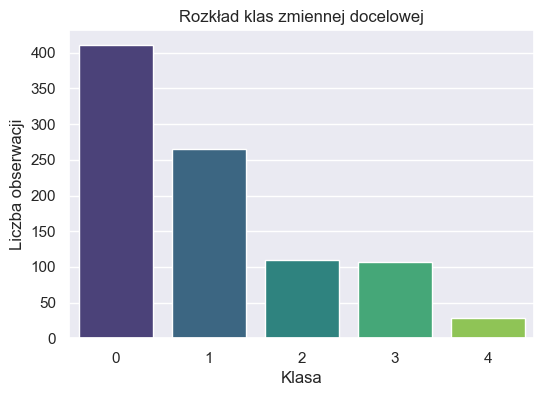

In [172]:
## Wizualizacja rozkładu klas

plt.figure(figsize=(6, 4))
sns.countplot(x="num", data=df, palette='viridis')
plt.title("Rozkład klas zmiennej docelowej")
plt.xlabel("Klasa")
plt.ylabel("Liczba obserwacji")
plt.show()

Największą liczebność posiada klasa 0, natomiast najmniejszą klasa 4. Aby nasz model nauczył się prawidłowo, w kolejnych etapach będziemy rozpatrywać dwie klasy: 0 - zdrowy, 1 - chory.

In [173]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,920.0,53.510870,9.424685,28.0,47.0,54.0,60.0,77.0
trestbps,861.0,132.132404,19.066070,0.0,120.0,130.0,140.0,200.0
chol,890.0,199.130337,110.780810,0.0,175.0,223.0,268.0,603.0
thalch,865.0,137.545665,25.926276,60.0,120.0,140.0,157.0,202.0
oldpeak,858.0,0.878788,1.091226,-2.6,0.0,0.5,1.5,6.2
ca,309.0,0.676375,0.935653,0.0,0.0,0.0,1.0,3.0
num,920.0,0.995652,1.142693,0.0,0.0,1.0,2.0,4.0


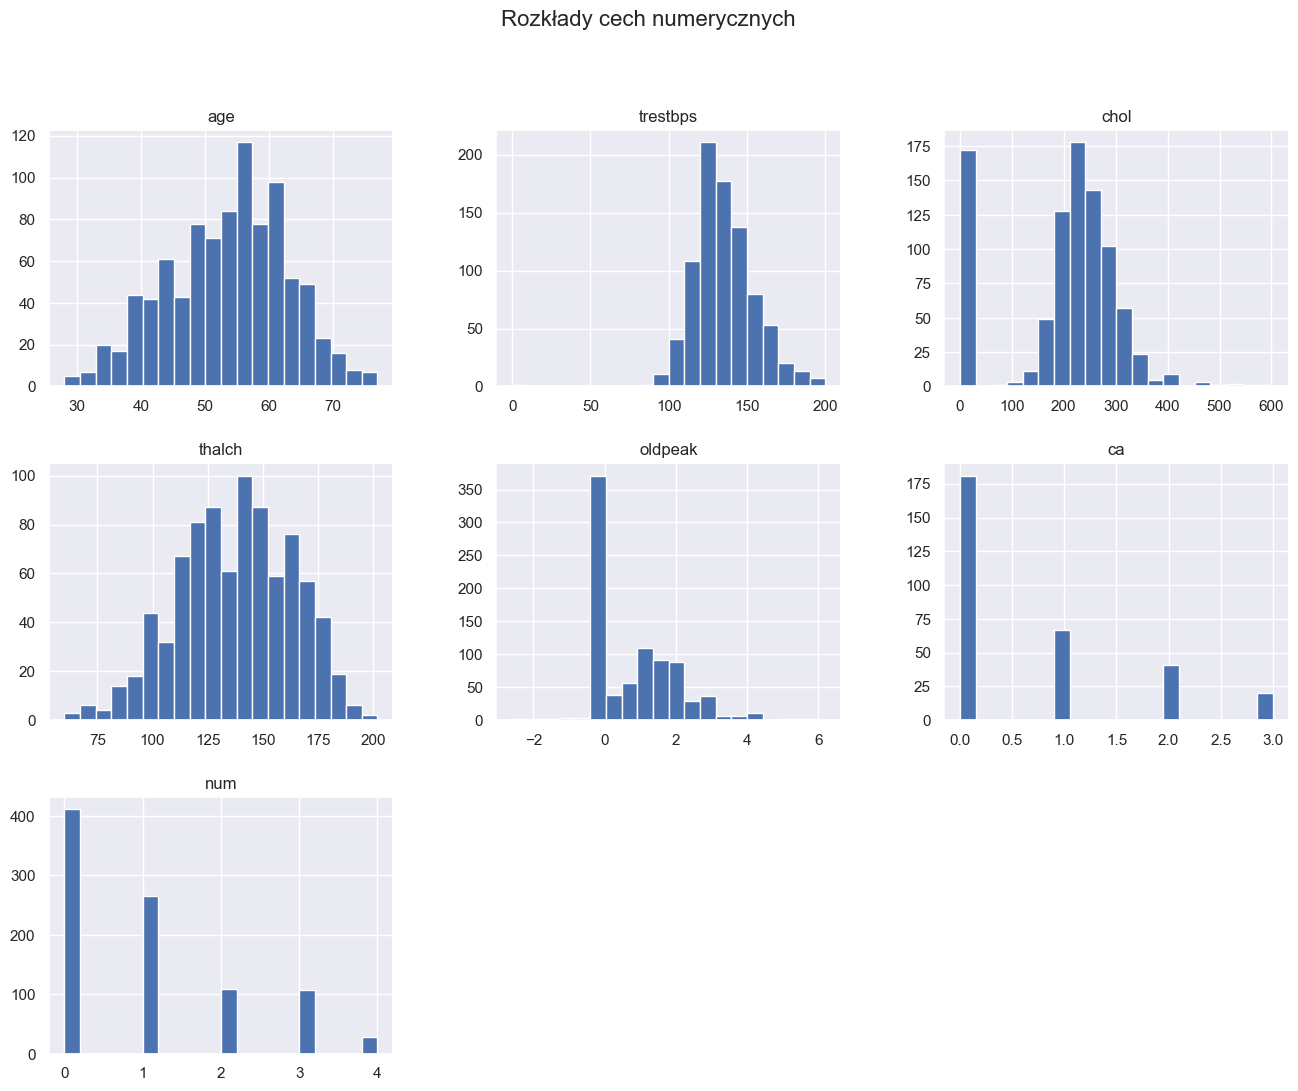

In [174]:
df.hist(figsize=(16, 12), bins=20)
plt.suptitle("Rozkłady cech numerycznych", fontsize=16)
plt.show()

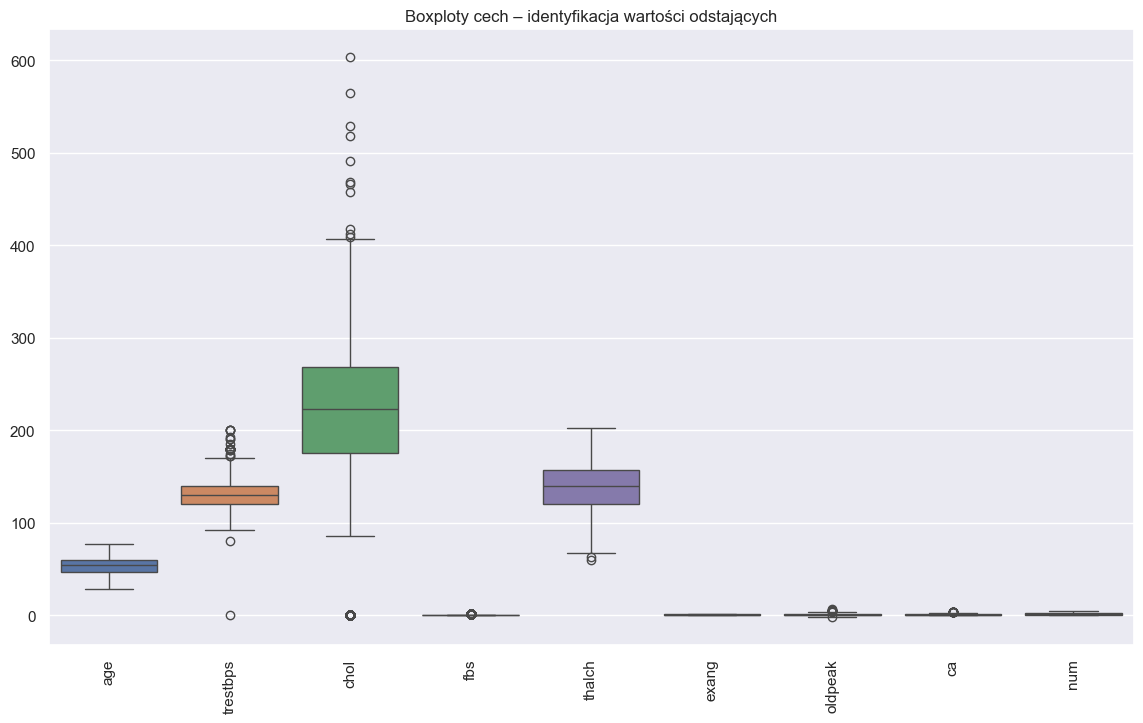

In [175]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxploty cech – identyfikacja wartości odstających")
plt.show()

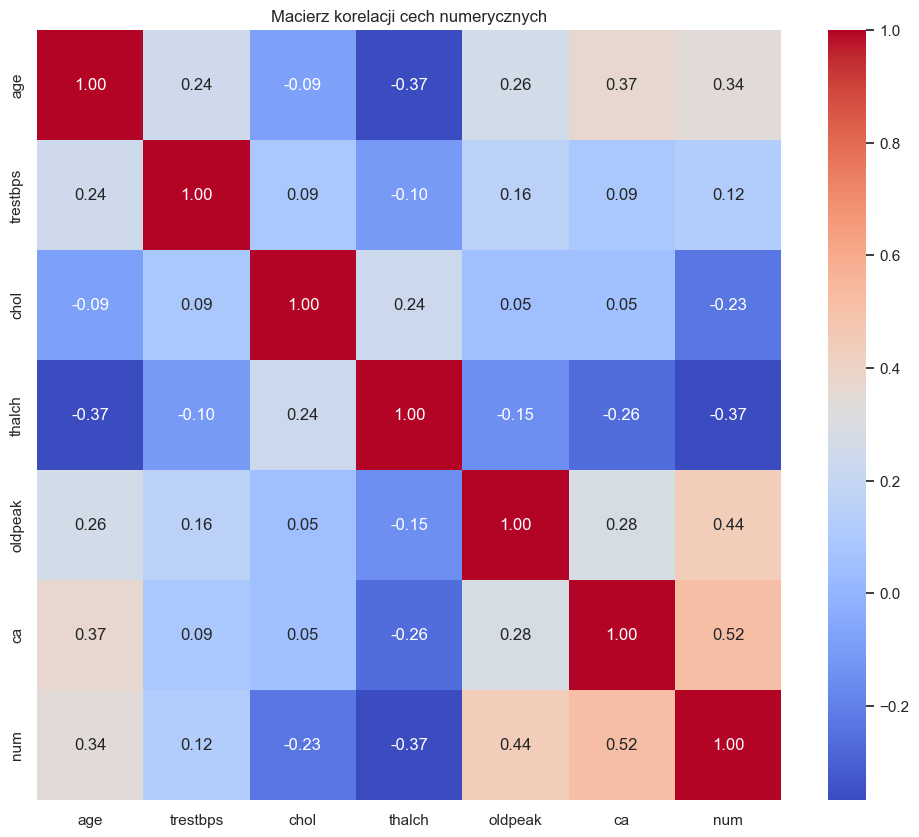

In [176]:
# Macierz korelacji
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Macierz korelacji cech numerycznych")
plt.show()

Najsilniejsze związki:
- _num_ i _ca_ : **0.52**, może to oznaczać, że liczba naczyń krwionośnych zabarwionych podczas fluoroskopii jest powiązana z diagnozą stanu zdrowia serca **num**
- _num_ i _oldpeak_ : **0.44** - wpływ odcinka ST na wykresie EKG ma związek z obecnością choroby
- _num_ i _age_ : **0.34** - ryzyko może rosnąć wraz z wiekiem pacjenta


Korelacje ujemne:
- _thalch_ i _age_ : **-0.37** - wraz z wzrostem wieku, niższe tętno maksymalne
- _thalch_ i _num_ : **-0.37** - pacjenci z chorobą mają niższe tętno maksymalne

Cholesterol(chol) ma niską korelację z większością danych

Wnioski: Cechy _ca_, _oldpeak_, _thalch_ oraz _age_ wydają się mieć największy wpływ na zmienną docelową _num_.

### Etap 2 - Przygotowanie danych

W poprzednim etapie zidentyfikowano następujące wyzwania:
- obecność braku danych w wielu cechach, szczególnie w tych najbardziej skorelowanych - **ca**, **oldpeak**
- różne skale zmiennych numerycznych
- cechy kategoryczne liczbowe
- wiele klas zmiennej docelowej

Jako, że w niektórych cechach jest duży brak, usunięcie mogłoby doprowadzić do utraty informacji, przyjeliśmy zastosowanie imputacji statystycznej:
- Użycie mediany dla chech numerycznych
- Zmienne kategoryczne - zastąpienie wartością najczęściej występującą

In [177]:
from sklearn.impute import SimpleImputer

numerical_features = [
    "age", "trestbps", "chol", "thalch", "oldpeak"
]

categorical_features = [
    "sex", "cp", "fbs", "restecg", "exang",
    "slope", "ca", "thal"
]

num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")

df[numerical_features] = num_imputer.fit_transform(df[numerical_features])
df[categorical_features] = cat_imputer.fit_transform(df[categorical_features])

In [178]:
## Analiza braku danych
miss_vals = df.isnull().sum()

miss_vals[miss_vals > 0]

Series([], dtype: int64)

Zamiast klasyfikować wieloklasowo, zastosujemy klasyfikację binarną, ze względu na to, że klasy 3,4 nie są zbyt liczne, co może powodować utrudnienie uczenia, zwiększenie ryzyko przeuczenia.

Klasa 0 -> zdrowi
Klasy 1,2,3,4 = 1 -> chorzy

In [179]:
df["target_binary"] = df["num"].apply(lambda x: 0 if x == 0 else 1)
df["target_binary"].value_counts()

target_binary
1    509
0    411
Name: count, dtype: int64

C:\Users\pawel\AppData\Local\Temp\ipykernel_7224\1663753859.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="target_binary", data=df, palette='viridis')


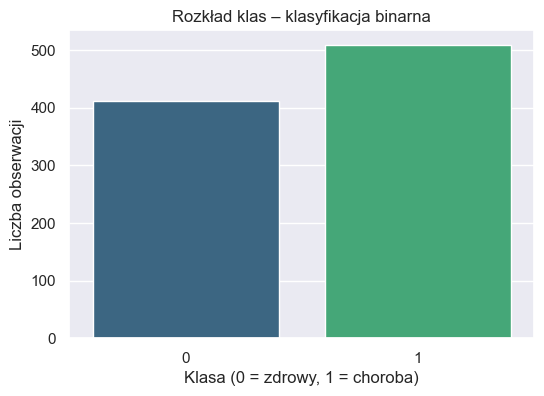

In [180]:
plt.figure(figsize=(6, 4))
sns.countplot(x="target_binary", data=df, palette='viridis')
plt.title("Rozkład klas – klasyfikacja binarna")
plt.xlabel("Klasa (0 = zdrowy, 1 = choroba)")
plt.ylabel("Liczba obserwacji")
plt.show()

In [181]:
# Kodowanie zmiennych kategorycznych
# Zastosowanie One-Hot-Encoding - zapobiega to wprowadzeniu sztucznego porządku
df_encoded = pd.get_dummies(
    df,
    columns=categorical_features,
    drop_first=True
)


In [182]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df_encoded.drop(["num", "target_binary"], axis=1)
y = df_encoded["target_binary"]


# Skalowanie danych
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# jako że dane mają rozległe wartości, zastosowano skalowanie, aby zapobiec sytuakcji w której model myśli, że jedna zmienna jest ważniejsza od drugiej

## Podział danych - 70% zbiór treningowy - 30% zbiór testowy

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

### Etap 3 - Projektowanie modelu sieci

Charakterystyka modeli:
- klasyfikacja binarna
- wyjście: osoba zdrowa/chora


Liczba modeli: **3**
Cechy modeli:
- funkcja aktywacji: sigmoid
- optymalizator: Adam
- metryka: accuracy

In [183]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
# Model bazowy

model1 = Sequential([
    Dense(16, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(1, activation="sigmoid")
])

model1.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model1.summary()

c:\Users\pawel\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 16)             │           336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 353 (1.38 KB)

 Trainable params: 353 (1.38 KB)

 Non-trainable params: 0 (0.00 B)

In [184]:
# Model 2 - Sieć głębsza
model2 = Sequential([
    Dense(32, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid")
])

model2.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 32)             │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,217 (4.75 KB)

 Trainable params: 1,217 (4.75 KB)

 Non-trainable params: 0 (0.00 B)

In [185]:
# Model 3 - z regularyzacją dropout
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

model3 = Sequential([
    Dense(
        32,
        activation="relu",
        kernel_regularizer=l2(0.001),
        input_shape=(X_train.shape[1],)
    ),
    Dropout(0.3),
    Dense(
        16,
        activation="relu",
        kernel_regularizer=l2(0.001)
    ),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

model3.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model3.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 32)             │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,217 (4.75 KB)

 Trainable params: 1,217 (4.75 KB)

 Non-trainable params: 0 (0.00 B)

### 4. Ocena opracowanych modeli

Założenia:
- liczba epok: 128
- batch size: 32
- walidacja: 20% zbioru
- EarlyStopping - zatrzyma uczenie w optymalnym momencie

Zbiór jest niewielki, istnieje ryzyko overfittingu

In [186]:
from tensorflow.keras.callbacks import EarlyStopping
EPOCHS = 128
VALIDATION_SPLIT = 0.2
BATCH_SIZE=32


early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

In [187]:
# Trening modelu 1
history_model1 = model1.fit(
    X_train,
    y_train,
    validation_split=VALIDATION_SPLIT,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/128
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3961 - loss: 0.9797 - val_accuracy: 0.3953 - val_loss: 0.9464
Epoch 2/128
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4621 - loss: 0.8755 - val_accuracy: 0.4729 - val_loss: 0.8495
Epoch 3/128
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5204 - loss: 0.7981 - val_accuracy: 0.5736 - val_loss: 0.7729
Epoch 4/128
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5495 - loss: 0.7348 - val_accuracy: 0.6124 - val_loss: 0.7097
Epoch 5/128
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6000 - loss: 0.6834 - val_accuracy: 0.6279 - val_loss: 0.6603
Epoch 6/128
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6350 - loss: 0.6448 - val_accuracy: 0.6512 - val_loss: 0.6266
Epoch 7/128
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6718 - loss: 0.6121 - val_accuracy: 0.6589 - val_loss: 0.5950
Epoch 8/128
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7107 - loss: 0.5832 - val_accuracy: 0.6899 - 

In [188]:
history_model2 = model2.fit(
    X_train,
    y_train,
    validation_split=VALIDATION_SPLIT,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/128
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5942 - loss: 0.6610 - val_accuracy: 0.6512 - val_loss: 0.6036
Epoch 2/128
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7184 - loss: 0.5785 - val_accuracy: 0.7829 - val_loss: 0.5340
Epoch 3/128
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7767 - loss: 0.5277 - val_accuracy: 0.7984 - val_loss: 0.4868
Epoch 4/128
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7883 - loss: 0.4884 - val_accuracy: 0.7829 - val_loss: 0.4609
Epoch 5/128
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8019 - loss: 0.4606 - val_accuracy: 0.8062 - val_loss: 0.4443
Epoch 6/128
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8019 - loss: 0.4403 - val_accuracy: 0.8217 - val_loss: 0.4294
Epoch 7/128
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8136 - loss: 0.4238 - val_accuracy: 0.8450 - val_loss: 0.4197
Epoch 8/128
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8175 - loss: 0.4115 - val_accuracy: 0.8372 - 

In [190]:
history_model3 = model3.fit(
    X_train,
    y_train,
    validation_split=VALIDATION_SPLIT,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/128
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6058 - loss: 0.7310 - val_accuracy: 0.7674 - val_loss: 0.6051
Epoch 2/128
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6408 - loss: 0.6869 - val_accuracy: 0.7597 - val_loss: 0.5773
Epoch 3/128
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6757 - loss: 0.6489 - val_accuracy: 0.7519 - val_loss: 0.5592
Epoch 4/128
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7049 - loss: 0.6389 - val_accuracy: 0.7752 - val_loss: 0.5411
Epoch 5/128
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7184 - loss: 0.6071 - val_accuracy: 0.7907 - val_loss: 0.5248
Epoch 6/128
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7379 - loss: 0.5848 - val_accuracy: 0.8217 - val_loss: 0.5103
Epoch 7/128
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7359 - loss: 0.5749 - val_accuracy: 0.8295 - val_loss: 0.4981
Epoch 8/128
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7728 - loss: 0.5480 - val_accuracy: 0.8295 - v

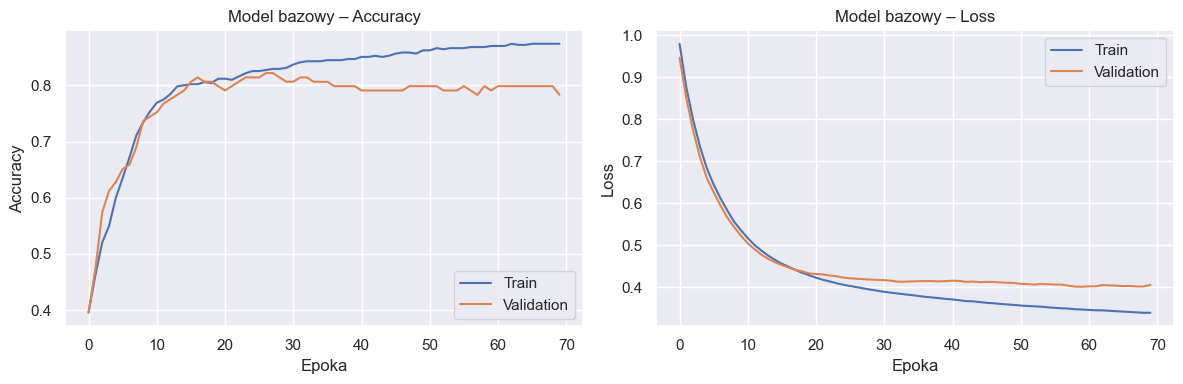

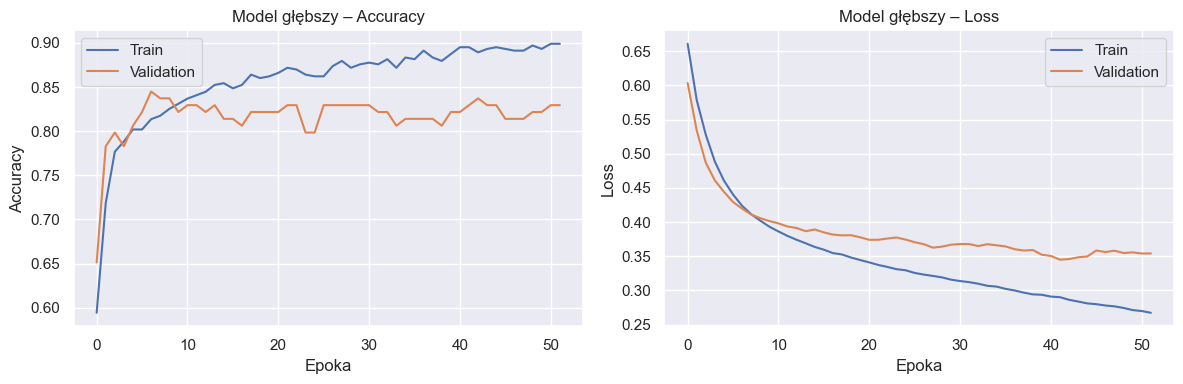

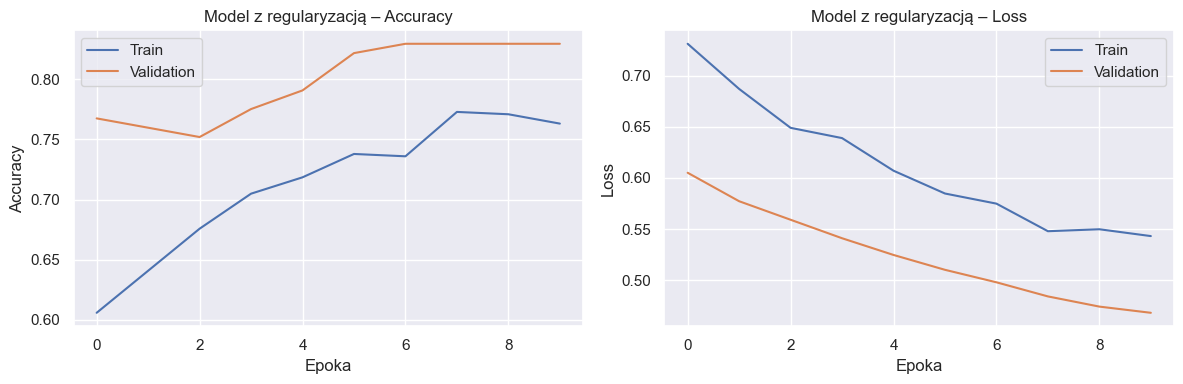

In [192]:
def plot_learning_curves(history, title):
    plt.figure(figsize=(12, 4))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Train")
    plt.plot(history.history["val_accuracy"], label="Validation")
    plt.title(f"{title} – Accuracy")
    plt.xlabel("Epoka")
    plt.ylabel("Accuracy")
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Train")
    plt.plot(history.history["val_loss"], label="Validation")
    plt.title(f"{title} – Loss")
    plt.xlabel("Epoka")
    plt.ylabel("Loss")
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_learning_curves(history_model1, "Model bazowy")
plot_learning_curves(history_model2, "Model głębszy")
plot_learning_curves(history_model3, "Model z regularyzacją")

In [195]:
# Miary jakości modelu
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix
)

def evaluate_model(y_true, y_pred_cls, y_pred_prob):
    return {
        "Accuracy": accuracy_score(y_true, y_pred_cls),
        "Precision": precision_score(y_true, y_pred_cls),
        "Recall": recall_score(y_true, y_pred_cls),
        "F1-score": f1_score(y_true, y_pred_cls),
        "ROC-AUC": roc_auc_score(y_true, y_pred_prob)
    }
    
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predykcja")
    plt.ylabel("Rzeczywista klasa")
    plt.show()

y_pred_model1 = model1.predict(X_test)
y_pred_model2 = model2.predict(X_test)
y_pred_model3 = model3.predict(X_test)

y_pred_model1_cls = (y_pred_model1 > 0.5).astype(int)
y_pred_model2_cls = (y_pred_model2 > 0.5).astype(int)
y_pred_model3_cls = (y_pred_model3 > 0.5).astype(int)

results_baseline = evaluate_model(y_test, y_pred_model1_cls, y_pred_model1)
results_deep = evaluate_model(y_test, y_pred_model2_cls, y_pred_model2)
results_regularized = evaluate_model(y_test, y_pred_model3_cls, y_pred_model3)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


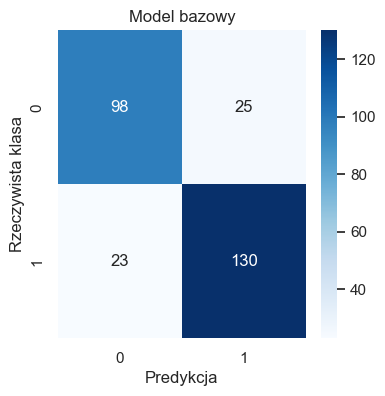

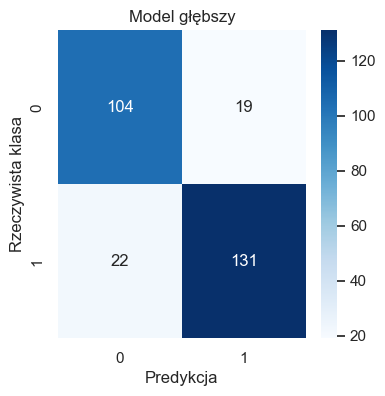

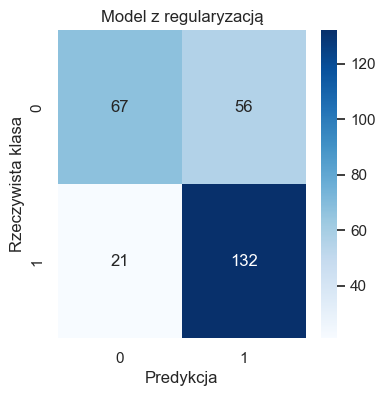

In [196]:
plot_conf_matrix(y_test, y_pred_model1_cls, "Model bazowy")
plot_conf_matrix(y_test, y_pred_model2_cls, "Model głębszy")
plot_conf_matrix(y_test, y_pred_model3_cls, "Model z regularyzacją")

In [198]:
results_df = pd.DataFrame.from_dict(
    {
        "Model1": results_baseline,
        "Model2": results_deep,
        "Model3": results_regularized
    },
    orient="index"
)

results_df

,Accuracy,Precision,Recall,F1-score,ROC-AUC
Model1,0.826087,0.838710,0.849673,0.844156,0.905308
Model2,0.851449,0.873333,0.856209,0.864686,0.896434
Model3,0.721014,0.702128,0.862745,0.774194,0.791700
